In [27]:
import pandas as pd
import pickle 

import pandas as pd
import statistics as myStats
import glob
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Revome scientific notation to expand numbers in the dataset up to the
# second decimal place.
pd.set_option('display.float_format', lambda x: '%.4f' % x)
#pd.set_option('display.float_format', lambda x: '%,g' % x)

data=pd.read_pickle('all_years.pkl')


In [2]:
data['Sale_Date'] = pd.to_datetime(data['Sale_Date'],)

data = data.sort_values(by="Sale_Date")
data

,Sale_Date,Sale_Time,UniSA_Receipt_No1,Receipt_Line_No,UniSA_Customer_No,Total_Sale_Amount_InclusiveGST,Total_Receipt_Lines,Barcode_Item,Item_Description,Quantity_Sold,Item_Value,Department_Name,Commodity_Name,Offer
100075,2013-01-02,15:14,525539,16,2690797360.0000,280.9600,44,9324463000096.0000,BUNCH FLOWERS 2,1.0000,9.9900,FRUIT & VEG,BUNCH FLOWERS,NO
100701,2013-01-02,15:23,525542,7,4498461089.0000,80.7200,21,201756000003.0000,MEDIUM SALAD,1.0000,5.4900,DELI,SALADS,NO
100702,2013-01-02,15:23,525542,8,4498461089.0000,80.7200,21,201756000003.0000,MEDIUM SALAD,1.0000,5.4900,DELI,SALADS,NO
100703,2013-01-02,15:23,525542,9,4498461089.0000,80.7200,21,542.0000,LEBANESE CUCUMBER,0.4100,2.0200,FRUIT & VEG,VEGETABLES,NO
100704,2013-01-02,15:23,525542,10,4498461089.0000,80.7200,21,515.0000,MUSHROOMS,0.2900,3.1900,FRUIT & VEG,VEGETABLES,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12186915,2015-12-31,09:45:46,15123111044042,11,9413990620.0000,47.5900,10,00000000004664,TOMATOES TRUSS,0.4250,1.5700,FRUIT & VEG,TOMATOES,NO
12186914,2015-12-31,09:45:46,15123111044042,10,9413990620.0000,47.5900,10,00000000000510,SWEETCORN,1.0000,1.4900,FRUIT & VEG,VEGETABLES,NO
12186913,2015-12-31,09:45:46,15123111044042,9,9413990620.0000,47.5900,10,00000000000542,LEBANESE CUCUMBER,0.2850,1.4200,FRUIT & VEG,VEGETABLES,NO
12186887,2015-12-31,09:40:48,15123111044041,29,8548751290.0000,164.5300,49,00000000000236,PASSIONFRUIT,1.0000,1.4900,FRUIT & VEG,FRUIT,NO


In [3]:
yearDataFile = pd.DataFrame(data=data)
yearDataFile['UniSA_Customer_No'] = ['%.12g' % n for n in yearDataFile['UniSA_Customer_No']]
del yearDataFile['Barcode_Item']
del yearDataFile['Receipt_Line_No']
del yearDataFile['Item_Description']
del yearDataFile['Department_Name']
del yearDataFile['Commodity_Name']
del yearDataFile['Total_Receipt_Lines']
del yearDataFile['Quantity_Sold']
del yearDataFile['Offer']
yearDataFile

,Sale_Date,Sale_Time,UniSA_Receipt_No1,UniSA_Customer_No,Total_Sale_Amount_InclusiveGST,Item_Value
100075,2013-01-02,15:14,525539,2690797360,280.9600,9.9900
100701,2013-01-02,15:23,525542,4498461089,80.7200,5.4900
100702,2013-01-02,15:23,525542,4498461089,80.7200,5.4900
100703,2013-01-02,15:23,525542,4498461089,80.7200,2.0200
100704,2013-01-02,15:23,525542,4498461089,80.7200,3.1900
...,...,...,...,...,...,...
12186915,2015-12-31,09:45:46,15123111044042,9413990620,47.5900,1.5700
12186914,2015-12-31,09:45:46,15123111044042,9413990620,47.5900,1.4900
12186913,2015-12-31,09:45:46,15123111044042,9413990620,47.5900,1.4200
12186887,2015-12-31,09:40:48,15123111044041,8548751290,164.5300,1.4900


In [7]:
# Create a "TimeStamp" variable.

pd.options.mode.chained_assignment = None  # default='warn'

yearDataFile['Sale_Date'].astype(str)
yearDataFile["Sale_Time"][yearDataFile["Sale_Time"] == 'nan'] = "00:00:00"

<ipython-input-7-b6a10e89e3db>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearDataFile["Sale_Time"][yearDataFile["Sale_Time"] == 'nan'] = "00:00:00"


In [8]:
yearDataFile['Sale_Time'] = yearDataFile['Sale_Time'].astype(str)
yearDataFile['Sale_Time_Length'] = yearDataFile['Sale_Time'].astype(str).map(len)

In [9]:
pd.options.mode.chained_assignment = None  # default='warn'
Seconds = ':00'
yearDataFile["Sale_Time"][yearDataFile["Sale_Time_Length"] == 5] = yearDataFile["Sale_Time"] + Seconds

<ipython-input-9-dfb577596655>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearDataFile["Sale_Time"][yearDataFile["Sale_Time_Length"] == 5] = yearDataFile["Sale_Time"] + Seconds


In [13]:
#Creating a new variable "Time Stamp"

yearDataFile['Sale_Date'] = yearDataFile['Sale_Date'].astype(str)
yearDataFile['TimeStamp'] = yearDataFile["Sale_Date"] + " " + yearDataFile["Sale_Time"]

yearDataFile

,Sale_Date,Sale_Time,UniSA_Receipt_No1,UniSA_Customer_No,Total_Sale_Amount_InclusiveGST,Item_Value,Sale_Time_Length,TimeStamp
100075,2013-01-02,15:14:00,525539,2690797360,280.9600,9.9900,8,2013-01-02 15:14:00
100701,2013-01-02,15:23:00,525542,4498461089,80.7200,5.4900,8,2013-01-02 15:23:00
100702,2013-01-02,15:23:00,525542,4498461089,80.7200,5.4900,8,2013-01-02 15:23:00
100703,2013-01-02,15:23:00,525542,4498461089,80.7200,2.0200,8,2013-01-02 15:23:00
100704,2013-01-02,15:23:00,525542,4498461089,80.7200,3.1900,8,2013-01-02 15:23:00
...,...,...,...,...,...,...,...,...
12186915,2015-12-31,09:45:46,15123111044042,9413990620,47.5900,1.5700,8,2015-12-31 09:45:46
12186914,2015-12-31,09:45:46,15123111044042,9413990620,47.5900,1.4900,8,2015-12-31 09:45:46
12186913,2015-12-31,09:45:46,15123111044042,9413990620,47.5900,1.4200,8,2015-12-31 09:45:46
12186887,2015-12-31,09:40:48,15123111044041,8548751290,164.5300,1.4900,8,2015-12-31 09:40:48


In [15]:
# Generating a "Key" to find number of trips.

yearDataFile['UniSA_Receipt_No1'] = yearDataFile['UniSA_Receipt_No1'].astype(str)
yearDataFile['Key'] = yearDataFile['UniSA_Receipt_No1'] + yearDataFile['TimeStamp']
yearDataFile.drop('Sale_Time_Length', axis=1, inplace=True)
yearDataFile

,Sale_Date,Sale_Time,UniSA_Receipt_No1,UniSA_Customer_No,Total_Sale_Amount_InclusiveGST,Item_Value,TimeStamp,Key
100075,2013-01-02,15:14:00,525539,2690797360,280.9600,9.9900,2013-01-02 15:14:00,5255392013-01-02 15:14:00
100701,2013-01-02,15:23:00,525542,4498461089,80.7200,5.4900,2013-01-02 15:23:00,5255422013-01-02 15:23:00
100702,2013-01-02,15:23:00,525542,4498461089,80.7200,5.4900,2013-01-02 15:23:00,5255422013-01-02 15:23:00
100703,2013-01-02,15:23:00,525542,4498461089,80.7200,2.0200,2013-01-02 15:23:00,5255422013-01-02 15:23:00
100704,2013-01-02,15:23:00,525542,4498461089,80.7200,3.1900,2013-01-02 15:23:00,5255422013-01-02 15:23:00
...,...,...,...,...,...,...,...,...
12186915,2015-12-31,09:45:46,15123111044042,9413990620,47.5900,1.5700,2015-12-31 09:45:46,151231110440422015-12-31 09:45:46
12186914,2015-12-31,09:45:46,15123111044042,9413990620,47.5900,1.4900,2015-12-31 09:45:46,151231110440422015-12-31 09:45:46
12186913,2015-12-31,09:45:46,15123111044042,9413990620,47.5900,1.4200,2015-12-31 09:45:46,151231110440422015-12-31 09:45:46
12186887,2015-12-31,09:40:48,15123111044041,8548751290,164.5300,1.4900,2015-12-31 09:40:48,151231110440412015-12-31 09:40:48


In [16]:
# From the "Sale Date" data, we get the day, month and date columns for each transaction.

def fetchMonthAndYearColumns(dataFile):
    dataFile["Day"] = dataFile["Sale_Date"].apply(lambda month: month.split("-")[2])
    dataFile["Month"] = dataFile["Sale_Date"].apply(lambda month: month.split("-")[1])
    dataFile["Year"] = dataFile["Sale_Date"].apply(lambda year: year.split("-")[0])
    dataFile.drop(columns = ["Sale_Date"])
    return dataFile

In [17]:
# Transform the "Sale Date" column into three different columns, one each for "Sale Day", "Sale Month" and "Sale Year".

yearDataFile = fetchMonthAndYearColumns(yearDataFile)
yearDataFile.head(50)

,Sale_Date,Sale_Time,UniSA_Receipt_No1,UniSA_Customer_No,Total_Sale_Amount_InclusiveGST,Item_Value,TimeStamp,Key,Day,Month,Year
100075,2013-01-02,15:14:00,525539,2690797360,280.9600,9.9900,2013-01-02 15:14:00,5255392013-01-02 15:14:00,02,01,2013
100701,2013-01-02,15:23:00,525542,4498461089,80.7200,5.4900,2013-01-02 15:23:00,5255422013-01-02 15:23:00,02,01,2013
100702,2013-01-02,15:23:00,525542,4498461089,80.7200,5.4900,2013-01-02 15:23:00,5255422013-01-02 15:23:00,02,01,2013
100703,2013-01-02,15:23:00,525542,4498461089,80.7200,2.0200,2013-01-02 15:23:00,5255422013-01-02 15:23:00,02,01,2013
100704,2013-01-02,15:23:00,525542,4498461089,80.7200,3.1900,2013-01-02 15:23:00,5255422013-01-02 15:23:00,02,01,2013
100705,2013-01-02,15:23:00,525542,4498461089,80.7200,6.2600,2013-01-02 15:23:00,5255422013-01-02 15:23:00,02,01,2013
100706,2013-01-02,15:23:00,525542,4498461089,80.7200,2.7700,2013-01-02 15:23:00,5255422013-01-02 15:23:00,02,01,2013
100707,2013-01-02,15:23:00,525542,4498461089,80.7200,1.6900,2013-01-02 15:23:00,5255422013-01-02 15:23:00,02,01,2013
100700,2013-01-02,15:23:00,525542,4498461089,80.7200,5.4900,2013-01-02 15:23:00,5255422013-01-02 15:23:00,02,01,2013
100708,2013-01-02,15:23:00,525542,4498461089,80.7200,1.6900,2013-01-02 15:23:00,5255422013-01-02 15:23:00,02,01,2013


In [19]:
# Download the file 

yearDataFile.to_pickle("Modified_Data.pkl")

In [21]:
# Convert the 'Sale_Date' to date-time format from string.

df = yearDataFile
df.drop(columns = ["TimeStamp"])
df['Sale_Date'] = pd.to_datetime(df['Sale_Date'],)

In [22]:
df['Week'] = df['Sale_Date'].dt.week
df

,Sale_Date,Sale_Time,UniSA_Receipt_No1,UniSA_Customer_No,Total_Sale_Amount_InclusiveGST,Item_Value,TimeStamp,Key,Day,Month,Year,Week
100075,2013-01-02,15:14:00,525539,2690797360,280.9600,9.9900,2013-01-02 15:14:00,5255392013-01-02 15:14:00,02,01,2013,1
100701,2013-01-02,15:23:00,525542,4498461089,80.7200,5.4900,2013-01-02 15:23:00,5255422013-01-02 15:23:00,02,01,2013,1
100702,2013-01-02,15:23:00,525542,4498461089,80.7200,5.4900,2013-01-02 15:23:00,5255422013-01-02 15:23:00,02,01,2013,1
100703,2013-01-02,15:23:00,525542,4498461089,80.7200,2.0200,2013-01-02 15:23:00,5255422013-01-02 15:23:00,02,01,2013,1
100704,2013-01-02,15:23:00,525542,4498461089,80.7200,3.1900,2013-01-02 15:23:00,5255422013-01-02 15:23:00,02,01,2013,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12186915,2015-12-31,09:45:46,15123111044042,9413990620,47.5900,1.5700,2015-12-31 09:45:46,151231110440422015-12-31 09:45:46,31,12,2015,53
12186914,2015-12-31,09:45:46,15123111044042,9413990620,47.5900,1.4900,2015-12-31 09:45:46,151231110440422015-12-31 09:45:46,31,12,2015,53
12186913,2015-12-31,09:45:46,15123111044042,9413990620,47.5900,1.4200,2015-12-31 09:45:46,151231110440422015-12-31 09:45:46,31,12,2015,53
12186887,2015-12-31,09:40:48,15123111044041,8548751290,164.5300,1.4900,2015-12-31 09:40:48,151231110440412015-12-31 09:40:48,31,12,2015,53


In [24]:
# First aggregate over a day.


aggregations1 = {
   "Item_Value": "sum",
   "Key": pd.Series.nunique
}

GroupWeek = df.groupby(by = ["Week"], as_index = False).agg(aggregations1).rename(columns = {"Item_Value": "Weekly_Total_Sales", "Key": "Weekly_Total_Trips"})
GroupWeek

,Week,Weekly_Total_Sales,Weekly_Total_Trips
0,1,2557961.2900,45897
1,2,2895645.1000,54637
2,3,2882423.7500,53874
3,4,2008816.5800,37356
4,5,2045463.3700,37671
5,6,2962621.8600,55810
6,7,3132393.5800,57560
7,8,2965392.7400,56088
8,9,2979032.6500,55735
9,10,3141575.5358,58972


In [25]:
GroupWeek = GroupWeek[GroupWeek['Week'] < 53]
GroupWeek

,Week,Weekly_Total_Sales,Weekly_Total_Trips
0,1,2557961.2900,45897
1,2,2895645.1000,54637
2,3,2882423.7500,53874
3,4,2008816.5800,37356
4,5,2045463.3700,37671
5,6,2962621.8600,55810
6,7,3132393.5800,57560
7,8,2965392.7400,56088
8,9,2979032.6500,55735
9,10,3141575.5358,58972


In [53]:
# Calculate statistics of distribution

pd.options.mode.chained_assignment = None  # default='warn'

GroupWeek["Weekly_Total_Sales"] = pd.to_numeric(GroupWeek["Weekly_Total_Sales"]).round(2)

# Mean for the distribution
print("Mean Weekly Total Sales: $" + str(round(myStats.mean(GroupWeek["Weekly_Total_Sales"]), 2)))

# Median for the distribution
print("Median Weekly Total Sales: $" + str(round(myStats.median(GroupWeek["Weekly_Total_Sales"]), 2)))

# Standard Deviation for the distribution
print("Volatility Weekly Total Sales: $" + str(round(myStats.stdev(GroupWeek["Weekly_Total_Sales"]), 2)))

Mean Weekly Total Sales: $2938321.18
Median Weekly Total Sales: $2932095.81
Volatility Weekly Total Sales: $241238.0


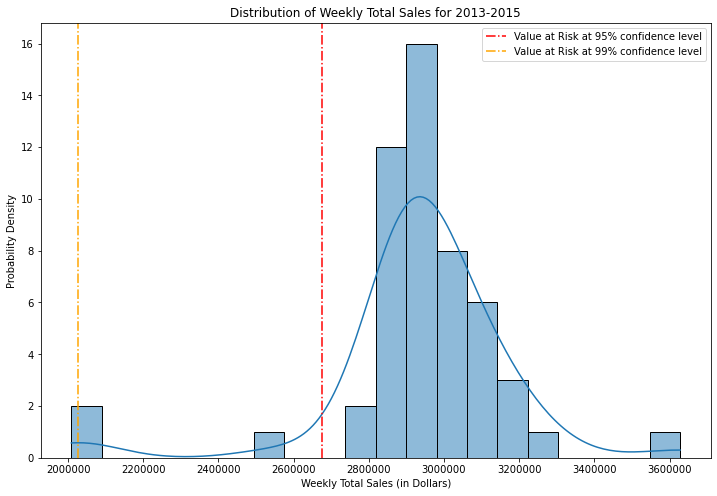

In [56]:
#Plot weekly sales distribution.

plt.figure(figsize = (12, 8))
sb.histplot(data=GroupWeek, x="Weekly_Total_Sales", bins = 20, kde=True)
plt.axvline(round(GroupWeek["Weekly_Total_Sales"].quantile(.05), 2), color = "red", linestyle = "-.", label = "Value at Risk at 95% confidence level")
plt.axvline(round(GroupWeek["Weekly_Total_Sales"].quantile(.01), 2), color = "orange", linestyle = "-.", label = "Value at Risk at 99% confidence level")
plt.xlabel("Weekly Total Sales (in Dollars)")
plt.ylabel("Probability Density")
plt.title("Distribution of Weekly Total Sales for 2013-2015")
plt.legend()
plt.ticklabel_format(style='plain')
plt.show()

In [57]:
# Calculating Value at Risk for Weekly Total Sales at 5% and 1% significance level:

print("Value at Risk for Daily Sales at 95% confidence level: $" + str(round(GroupWeek["Weekly_Total_Sales"].quantile(.05), 2)))
print("Value at Risk for Daily Sales at 99% confidence level: $" + str(round(GroupWeek["Weekly_Total_Sales"].quantile(.01), 2)))

Value at Risk for Daily Sales at 95% confidence level: $2674753.26
Value at Risk for Daily Sales at 99% confidence level: $2027506.44


In [62]:
from statsmodels.distributions.empirical_distribution import ECDF
ECDF_GroupWeek = ECDF(GroupWeek['Weekly_Total_Sales'])
ECDF_GroupWeek

In [63]:
A = GroupWeek['Weekly_Total_Sales']

def ecdf(data):
    """ Compute ECDF """
    x = np.sort(A)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

In [65]:
ecdf(A)

(array([2008816.58, 2045463.37, 2557961.29, 2770310.32, 2774210.34,
        2832427.2 , 2835431.74, 2852760.51, 2856514.16, 2862151.16,
        2871530.56, 2876356.12, 2881240.44, 2882423.75, 2892221.86,
        2892388.55, 2895645.1 , 2901450.68, 2905648.4 , 2906861.05,
        2910530.77, 2911439.27, 2915732.8 , 2917861.69, 2926054.8 ,
        2926303.98, 2937887.64, 2939200.51, 2952060.38, 2956822.23,
        2962621.86, 2965392.74, 2979032.65, 2989936.93, 2996799.27,
        2997787.09, 3003296.27, 3005717.98, 3013151.54, 3046766.55,
        3047901.45, 3088363.5 , 3099922.82, 3105235.92, 3120297.01,
        3132393.58, 3141575.54, 3177146.75, 3185070.77, 3209477.4 ,
        3301223.46, 3627883.21]),
 array([0.01923077, 0.03846154, 0.05769231, 0.07692308, 0.09615385,
        0.11538462, 0.13461538, 0.15384615, 0.17307692, 0.19230769,
        0.21153846, 0.23076923, 0.25      , 0.26923077, 0.28846154,
        0.30769231, 0.32692308, 0.34615385, 0.36538462, 0.38461538,
        0.4038